In [1]:
#webscraping
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time
# graphing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#request user LinkedIn username password profile and number of posts:
print("Please enter the exact LinkedIn Username you use to login (email/phone?):")
username = str(input()) 
print()
print("Please enter your exact LinkedIn Password:")
password = str(input())
print()
print("Please enter your exact profile Username as it appears in your profile link (everything after '/in/') :")
link = str(input())
print()
print("Please enter the exact Number (as a number) of the last posts you want to analyse:")
posts = int(input())

Please enter the exact LinkedIn Username you use to login (email/phone?):

Please enter your exact LinkedIn Password:

Please enter your exact profile Username as it appears in your profile link (everything after '/in/') :

Please enter the exact Number (as a number) of the last posts you want to analyse:


In [3]:
# (Google Chrome) webdriver 
browser = webdriver.Chrome("C:/Users/eddie/Desktop/Ironhack/MY PROJECTS/LinkedIn-Analysis/chrome_driver/chromedriver.exe.")

C:\Users\eddie\AppData\Local\Temp/ipykernel_17620/705993214.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("C:/Users/eddie/Documents/Eddie_Data_Job/Chrome_Driver/chromedriver.exe.")


In [4]:
# LinkedIn login username and password
browser.get('https://www.linkedin.com/login')
elementID = browser.find_element_by_id('username')
elementID.send_keys(username)
elementID = browser.find_element_by_id('password')
elementID.send_keys(password)
elementID.submit()

C:\Users\eddie\AppData\Local\Temp/ipykernel_17620/2564341591.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elementID = browser.find_element_by_id('username')
C:\Users\eddie\AppData\Local\Temp/ipykernel_17620/2564341591.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elementID = browser.find_element_by_id('password')


In [5]:
recent_linkedin = "https://www.linkedin.com/in/" + link + "/detail/recent-activity/shares/"
browser.get(recent_linkedin)

In [6]:
scrolls = -(-posts // 5)  

In [7]:
likes = []
comments = []
views = []
scroll_timer = 5

In [8]:
old_height = browser.execute_script("return document.body.scrollHeight")
for scroll in range(scrolls) : 
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_timer)
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == old_height:
        break
    old_height = new_height    

In [9]:
src = browser.page_source
soup = BeautifulSoup(src, features="lxml") 

In [10]:
#LIKES section
likes_bs4tags = soup.find_all("span", attrs = {"class" : "social-details-social-counts__social-proof-fallback-number"})
for tag in likes_bs4tags:
    strtag = str(tag)
    matches_list = re.findall('[,0-9]+',strtag)
    old_string = matches_list.pop()
    no_comma = old_string.replace(',','')
    likes_integer = int(no_comma)
    likes.append(likes_integer)

In [11]:
# COMMENTS section
comments_bs4tags = soup.find_all("li", attrs = {"class" : "social-details-social-counts__comments social-details-social-counts__item social-details-social-counts__item--with-social-proof"})
for tag in comments_bs4tags:
    strtag = str(tag)
    matches_list = re.findall('[,0-9]+',strtag)
    old_string = matches_list.pop()
    no_comma = old_string.replace(',','')
    comments_integer = int(no_comma)
    comments.append(comments_integer)

In [12]:
# VIEWS section
views_bs4tags = soup.find_all("span", attrs = {"class" : "icon-and-text-container t-14 t-black--light t-normal"})
for tag in views_bs4tags:
    strtag = str(tag)
    matches_list = re.findall('[,0-9]+',strtag)
    old_string = matches_list.pop()
    no_comma = old_string.replace(',','')
    views_integer = int(no_comma)
    views.append(views_integer)  

In [13]:
#Print
print(likes) 
print(comments)
print(views)

[7, 14, 14]
[2, 7, 1]
[825, 32, 944]


In [14]:
# Reverse lists
likes.reverse()
comments.reverse()
views.reverse()

In [15]:
# Convert lists into DataFrames
likes_df = pd.DataFrame(likes, columns = ['Likes'])
comments_df = pd.DataFrame(comments, columns =['Comments'])
views_df = pd.DataFrame(views, columns =['Views'])

In [16]:
# Get rid of outliers
likes_df_no_outliers = likes_df[np.abs(likes_df-likes_df.median()) <= (3*likes_df.std())]
comments_df_no_outliers = comments_df[np.abs(comments_df-comments_df.median()) <= (3*comments_df.std())]
views_df_no_outliers = views_df[np.abs(views_df-views_df.median()) <= (3*views_df.std())]

In [17]:
# Replace NaNs with median values
likes_df_no_outliers['Likes'].fillna((likes_df_no_outliers['Likes'].median()), inplace=True)
comments_df_no_outliers['Comments'].fillna((comments_df_no_outliers['Comments'].median()), inplace=True)
views_df_no_outliers['Views'].fillna((views_df_no_outliers['Views'].median()), inplace=True)

In [18]:
print('LIKES SECTION')

   
   LIKES SECTION  
   


Slope: [-3.5]
NRMSE Error: Likes    0.235702
dtype: float64


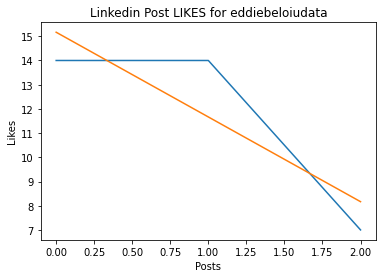

<Figure size 432x288 with 0 Axes>

In [19]:
coefficients_likes, residuals_likes, _, _, _ = np.polyfit(range(len(likes_df_no_outliers)),likes_df_no_outliers,1,full=True)
mse_likes = (residuals_likes[0])/(len(likes_df_no_outliers))
nrmse_likes = (np.sqrt(mse_likes))/(likes_df_no_outliers.max() - likes_df_no_outliers.min())
slope_likes = coefficients_likes[0]
print('Slope: ' + str(slope_likes))
print('NRMSE Error: ' + str(nrmse_likes))
plt.plot(likes_df_no_outliers)
plt.plot([slope_likes*x + coefficients_likes[1] for x in range(len(likes_df_no_outliers))])
plt.title('Linkedin Post LIKES for ' + link)
plt.xlabel('Posts')
plt.ylabel('Likes')
# save image
plt.savefig(link + '-linkedin-likes-last-' + str(posts) + '-posts_GRAPH.png', dpi=600)
plt.show()
plt.clf()

In [20]:
print('COMMENTS SECTION')

   
   COMMENTS SECTION   
   


Slope: [0.5]
NRMSE Error: Comments    0.432121
dtype: float64


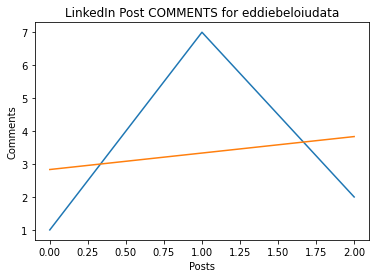

<Figure size 432x288 with 0 Axes>

In [21]:
coefficients_comments, residuals_comments, _, _, _ = np.polyfit(range(len(comments_df_no_outliers)),comments_df_no_outliers,1,full=True)
mse_comments = (residuals_comments[0])/(len(comments_df_no_outliers))
nrmse_comments = (np.sqrt(mse_comments))/(comments_df_no_outliers.max() - comments_df_no_outliers.min())
slope_comments = coefficients_comments[0]
print('Slope: ' + str(slope_comments))
print('NRMSE Error: ' + str(nrmse_comments))
plt.plot(comments_df_no_outliers)
plt.plot([slope_comments*x + coefficients_comments[1] for x in range(len(comments_df_no_outliers))])
plt.title('LinkedIn Post COMMENTS for ' + link)
plt.xlabel('Posts')
plt.ylabel('Comments')
# save image
plt.savefig(link + '-linkedin-comments-last-' + str(posts) + '-posts_GRAPH.png', dpi=600)
plt.show()
plt.clf()

In [22]:
print('VIEWS SECTION')

   
   VIEWS SECTION   
   


Slope: [-59.5]
NRMSE Error: Views    0.44065
dtype: float64


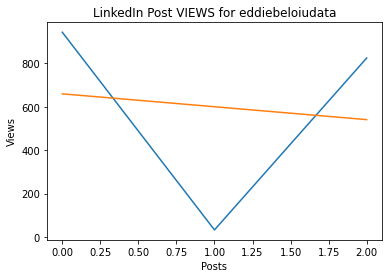

<Figure size 432x288 with 0 Axes>

In [23]:
coefficients_views, residuals_views, _, _, _ = np.polyfit(range(len(views_df_no_outliers)),views_df_no_outliers,1,full=True)
mse_views = (residuals_views[0])/(len(views_df_no_outliers))
nrmse_views = (np.sqrt(mse_views))/(views_df_no_outliers.max() - views_df_no_outliers.min())
slope_views = coefficients_views[0]
print('Slope: ' + str(slope_views))
print('NRMSE Error: ' + str(nrmse_views))
plt.plot(views_df_no_outliers)
plt.plot([slope_views*x + coefficients_views[1] for x in range(len(views_df_no_outliers))])
plt.title('LinkedIn Post VIEWS for ' + link)
plt.xlabel('Posts')
plt.ylabel('Views')
# save image
plt.savefig(link + '-linkedin-views-last-' + str(posts) + '-posts_GRAPH.png', dpi=600)
plt.show()
plt.clf()

In [24]:
# Save DataFrames to CSV 
likes_df_no_outliers.to_csv(link + '-linkedin-likes-last-' + str(posts) + '-posts_CSV.csv') 
comments_df_no_outliers.to_csv(link + '-linkedin-comments-last-' + str(posts) + '-posts_CSV.csv') 
views_df_no_outliers.to_csv(link + '-linkedin-views-last-' + str(posts) + '-posts_CSV.csv') 

In [25]:
print('Finished!')

   
   Finished!   
   
